# Preprocessing Data

In [1]:
# import the libraries
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# import and see train_data.csv
df_train_csv = dd.read_csv('Data/train_data.csv')
df_train_csv.head()

,sequence_id,sequence,experiment_type,dataset_name,reads,signal_to_noise,SN_filter,reactivity_0001,reactivity_0002,reactivity_0003,...,reactivity_error_0197,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206
0,8cdfeef009ea,GGGAACGACUCGAGUAGAGUCGAAAAACGUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,2343,0.944,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51e61fbde94d,GGGAACGACUCGAGUAGAGUCGAAAAACAUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,5326,1.933,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25ce8d5109cd,GGGAACGACUCGAGUAGAGUCGAAAAACCUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,4647,2.347,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07dcfb6d1965,GGGAACGACUCGAGUAGAGUCGAAAAACUUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,102843,11.824,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e561cc042a4c,GGGAACGACUCGAGUAGAGUCGAAAAACGAUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,7665,3.519,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# apply SN-filter
df_sn = df_train_csv[df_train_csv["SN_filter"]==1]

# split into 2A3 MaP and DMS MaP datasets
df_2A3 = df_sn[df_sn["experiment_type"]=="2A3_MaP"]
df_DMS = df_sn[df_sn["experiment_type"]=="DMS_MaP"]

# split into train and test
X_2A3 = df_2A3["sequence"]
y_2A3 = df_2A3.loc[:, df_2A3.columns.str.fullmatch("reactivity_\d\d\d\d")]
X_2A3_train, X_2A3_test, y_2A3_train, y_2A3_test = train_test_split(X_2A3, y_2A3, test_size=0.2, shuffle=True, blockwise=True, random_state=42)

X_DMS = df_DMS["sequence"]
y_DMS = df_DMS.loc[:, df_DMS.columns.str.fullmatch("reactivity_\d\d\d\d")]
X_DMS_train, X_DMS_test, y_DMS_train, y_DMS_test = train_test_split(X_DMS, y_DMS, test_size=0.2, shuffle=True, blockwise=True, random_state=42)

In [4]:
X_2A3_train.head()

2034     GGGAACGACUCGAGUAGAGUCGAAAAGUGGAGUUCCUGUUGUAGAU...
40076    GGGAACGACUCGAGUAGAGUCGAAAACUUAGUUGCAGAGUGGUUUU...
14709    GGGAACGACUCGAGUAGAGUCGAAAAUUGAAGGUAAAACAGCCUGU...
10595    GGGAACGACUCGAGUAGAGUCGAAAACUGAUGUUGAGACCAAUGAA...
4312     GGGAACGACUCGAGUAGAGUCGAAAAUCCAAGAACUUGGAACAGUA...
Name: sequence, dtype: object

In [5]:
y_2A3_train.head()

,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,reactivity_0009,reactivity_0010,...,reactivity_0197,reactivity_0198,reactivity_0199,reactivity_0200,reactivity_0201,reactivity_0202,reactivity_0203,reactivity_0204,reactivity_0205,reactivity_0206
2034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# import and see train_sequences.csv
df_test_csv = dd.read_csv('Data/test_sequences.csv')
df_test_csv.head()

,id_min,id_max,sequence_id,sequence,future
0,0,176,eee73c1836bc,GGGAACGACUCGAGUAGAGUCGAAAAUUUCCUUCCAAAUCCUGAGG...,0
1,177,353,d2a929af7a97,GGGAACGACUCGAGUAGAGUCGAAAAUGUAAUCAGAUUGCUUCUCC...,0
2,354,530,d39a4425ff45,GGGAACGACUCGAGUAGAGUCGAAAAAACACAUGAAUUUGAGGGUU...,0
3,531,707,1fc41e92d553,GGGAACGACUCGAGUAGAGUCGAAAAUCAGAGCUGGCAAAUGGAUG...,0
4,708,884,1d0826fb892f,GGGAACGACUCGAGUAGAGUCGAAAAUUUGGUAUUUGAUGCAUUAA...,0


In [10]:
# create mutate and map dataset
id1=269545321
id2=269724007
df_mmap = df_test_csv[(id1 <= df_test_csv["id_min"]) & (df_test_csv["id_max"] <= id2)]["sequence"]

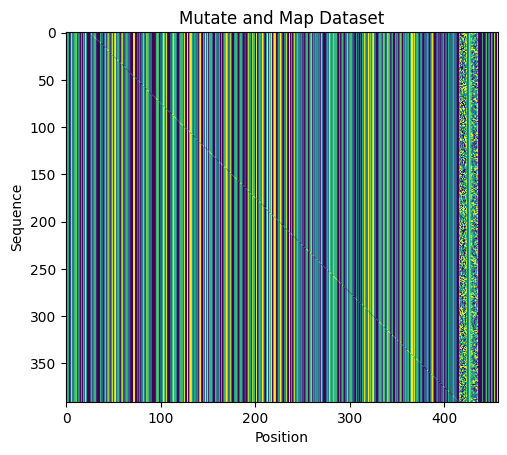

In [17]:
# visualize mutate and map dataset
df_mmap_num = df_mmap.str.split(pat="(?<=[AUGC])(?=[AUGC])", n=456, expand=True)
df_mmap_num[df_mmap_num == "A"] = 0
df_mmap_num[df_mmap_num == "U"] = 1
df_mmap_num[df_mmap_num == "G"] = 2
df_mmap_num[df_mmap_num == "C"] = 3
df_mmap_num = df_mmap_num.astype("float")
plt.imshow(df_mmap_num.compute())
plt.title("Mutate and Map Dataset")
plt.xlabel("Position")
plt.ylabel("Sequence")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fe343e39-d2c0-4296-915d-091d9a42752d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>